<a href="https://colab.research.google.com/github/Beczheng/datasci_6_anova/blob/main/HHA_507_HW_6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing packages

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 2. Loading the dataset

In [ ]:
# Fetching the dataset

diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)
x = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [ ]:
# Turning the dataset into a pandas dataframe for the variable x

df1 = pd.DataFrame(x)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
# Turning the dataset into a pandas dataframe for the variable y

df2 = pd.DataFrame(y)
df2

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


# 3. Cleaning the dataset

## Creating a new table

In [ ]:
# Creating a new table for the variables of interest

new_table = df1[['race', 'time_in_hospital', 'A1Cresult']]
new_table

,race,time_in_hospital,A1Cresult
0,Caucasian,1,None
1,Caucasian,3,None
2,AfricanAmerican,2,None
3,Caucasian,2,None
4,Caucasian,1,None
...,...,...,...
101761,AfricanAmerican,3,>8
101762,AfricanAmerican,5,None
101763,Caucasian,1,None
101764,Caucasian,10,None


## Renaming the columns for the new table

In [ ]:
# Renaming the columns for the new table

renamed_table = new_table.rename(columns={'A1Cresult' : 'a1c_result'})
renamed_table

,race,time_in_hospital,a1c_result
0,Caucasian,1,None
1,Caucasian,3,None
2,AfricanAmerican,2,None
3,Caucasian,2,None
4,Caucasian,1,None
...,...,...,...
101761,AfricanAmerican,3,>8
101762,AfricanAmerican,5,None
101763,Caucasian,1,None
101764,Caucasian,10,None


## Checking for missing values for the new table

In [ ]:
# Checking for missing values for the new table

renamed_table.isna().sum()

race                2273
time_in_hospital       0
a1c_result             0
dtype: int64

## Dropping missing values for the new table

In [ ]:
# Dropping missing values for the new table

new_df = renamed_table.dropna()
new_df

,race,time_in_hospital,a1c_result
0,Caucasian,1,None
1,Caucasian,3,None
2,AfricanAmerican,2,None
3,Caucasian,2,None
4,Caucasian,1,None
...,...,...,...
101761,AfricanAmerican,3,>8
101762,AfricanAmerican,5,None
101763,Caucasian,1,None
101764,Caucasian,10,None


# 4. Creating a research question and variables

- **Research question:** Does the patient's race and their A1C test results jointly influence the duration of their hospital stay?
- **Factor 1:** Race
- **Factor 2:** A1C test result
- **Dependent variable:** Duration hospital stay


# 5. Assumption checks

## Normality

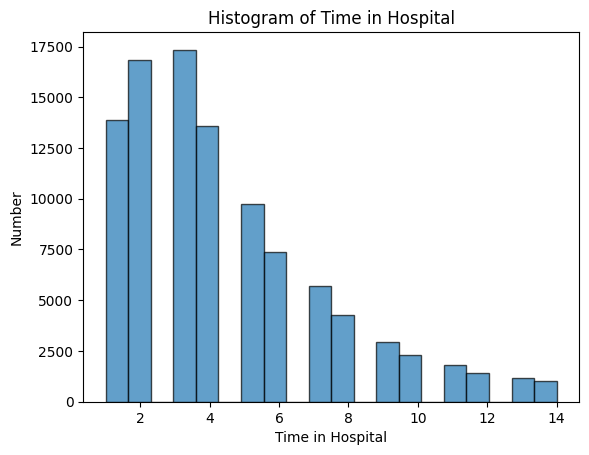

In [ ]:
# Creating a histogram

plt.hist(new_df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time in Hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Number')
plt.show()

In [ ]:
# Conducting the Shapiro-Wilk test

print('Main DV: ', stats.shapiro(new_df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8867098093032837, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Grouping race and a1c_result

groups = new_df.groupby(['race', 'a1c_result'])

for (race_status, a1c_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {a1c_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Interpretation

print('Null hypothesis (H0): The data follows a normal distribution.')
print('Alternative hypothesis (H1): The data does not follow a normal distribution.')

shapiro_p = 0.0

if shapiro_p < 0.05:
  print('Interpretation: Since the p-value is less than 0.05, reject null hypothesis. The data does not follow a normal distrubution.')
else:
  print('Interpretation: Since the p-value is greater than 0.05, accept null hypothesis. The data follows a normal distrubution.')

Null hypothesis (H0): The data follows a normal distribution.
Alternative hypothesis (H1): The data does not follow a normal distribution.
Interpretation: Since the p-value is less than 0.05, reject null hypothesis. The data does not follow a normal distrubution.


## Homoscedasticity

In [ ]:
# Conducting the Levene's test

group1 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == '>7']
group2 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == '>8']
group3 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == 'None']
group4 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == 'Norm']
group5 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == '>7']
group6 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == '>8']
group7 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == 'None']
group8 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == 'Norm']
group9 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == '>7']
group10 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == '>8']
group11 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == 'None']
group12 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == 'Norm']
group13 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == '>7']
group14 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == '>8']
group15 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == 'None']
group16 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == 'Norm']
group17 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == '>7']
group18 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == '>8']
group19 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == 'None']
group20 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == 'Norm']

stats.levene(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19, group20)

LeveneResult(statistic=7.4501020039258, pvalue=9.580811219790571e-21)

In [ ]:
# Interpretation

print('Null hypothesis (H0): The variances are equal across groups.')
print('Alternative hypothesis (H1): The variances are not equal across groups.')

levene_p = 9.580811219790571**-21

if levene_p < 0.05:
  print('Interpretation: Since the p-value is less than 0.05, reject the null hypothesis. The variances are not equal across all groups and the homogeneity of variance is violated.')
else:
  print('Interpretation: Since the p-value is greater than 0.05, accept the null hypothesis. The variances are equal across all groups and the homogeneity of variance is not violated.')

Null hypothesis (H0): The variances are equal across groups.
Alternative hypothesis (H1): The variances are not equal across groups.
Interpretation: Since the p-value is less than 0.05, reject the null hypothesis. The variances are not equal across all groups and the homogeneity of variance is violated.


# 6. ANOVA

## Non-parametric ANOVA

In [ ]:
# Conducting the Kruskal-Wallis test

group1 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == '>7']
group2 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == '>8']
group3 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == 'None']
group4 = new_df['time_in_hospital'][new_df['race'] == 'AfricanAmerican'][new_df['a1c_result'] == 'Norm']
group5 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == '>7']
group6 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == '>8']
group7 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == 'None']
group8 = new_df['time_in_hospital'][new_df['race'] == 'Caucasian'][new_df['a1c_result'] == 'Norm']
group9 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == '>7']
group10 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == '>8']
group11 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == 'None']
group12 = new_df['time_in_hospital'][new_df['race'] == 'Hispanic'][new_df['a1c_result'] == 'Norm']
group13 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == '>7']
group14 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == '>8']
group15 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == 'None']
group16 = new_df['time_in_hospital'][new_df['race'] == 'Asian'][new_df['a1c_result'] == 'Norm']
group17 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == '>7']
group18 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == '>8']
group19 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == 'None']
group20 = new_df['time_in_hospital'][new_df['race'] == 'Other'][new_df['a1c_result'] == 'Norm']

stats.kruskal(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19, group20)

KruskalResult(statistic=586.9162836240483, pvalue=2.904007184732194e-112)

In [ ]:
# Interpretation

print('Null hypothesis (H0): The difference is not statistically significant across the groups.')
print('Alternative hypothesis (H1): The difference is statistically significant across the groups.')

kruskal_wallis_p = 2.904007184732194**-112

if kruskal_wallis_p < 0.05:
  print('Interpretation: Since the p-value is less than 0.05, reject the null hypothesis. The difference is statistically significant across the groups.')
else:
  print('Interpretation: Since the p-value is greater than 0.05, reject the null hypothesis. The difference is not statistically significant across the groups.')

Null hypothesis (H0): The difference is not statistically significant across the groups.
Alternative hypothesis (H1): The difference is statistically significant across the groups.
Interpretation: Since the p-value is less than 0.05, reject the null hypothesis. The difference is statistically significant across the groups.


## Post-hoc test

In [ ]:
# Condcucting the Tukey-Kramer test

posthoc_race = pairwise_tukeyhsd(endog=new_df['time_in_hospital'], groups=new_df['race'], alpha=0.05)
print("Tukey HSD test for Race:\n", posthoc_race)

posthoc_a1c = pairwise_tukeyhsd(endog=new_df['time_in_hospital'], groups=new_df['a1c_result'], alpha=0.05)
print("\nTukey HSD test for A1C Result:\n", posthoc_a1c)

Tukey HSD test for Race:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
AfricanAmerican     Asian  -0.5125 0.0002 -0.8396 -0.1855   True
AfricanAmerican Caucasian  -0.1221    0.0 -0.1879 -0.0564   True
AfricanAmerican  Hispanic   -0.448    0.0 -0.6378 -0.2582   True
AfricanAmerican     Other  -0.2343 0.0278 -0.4523 -0.0163   True
          Asian Caucasian   0.3904 0.0087  0.0673  0.7135   True
          Asian  Hispanic   0.0646 0.9894 -0.3043  0.4335  False
          Asian     Other   0.2783 0.2778 -0.1059  0.6624  False
      Caucasian  Hispanic  -0.3258    0.0 -0.5087  -0.143   True
      Caucasian     Other  -0.1121 0.5995 -0.3241  0.0998  False
       Hispanic     Other   0.2137 0.2175 -0.0631  0.4905  False
----------------------------------------------------------------

Tukey HSD test for A1C Result:
 Multiple Comparison of Means - 

In [ ]:
# Interpretation

print('Null hypothesis (H0): The difference is not statistically significant between the two groups.')
print('Alternative hypothesis (H1): The difference is statistically significant between the two groups.')

def tukey_func(x):
  if x < 0.05:
    result = 'The difference IS statistically significant between the two groups.'
  else:
    result = 'The difference IS NOT statistically significant between the two groups.'
  return result

Null hypothesis (H0): The difference is not statistically significant between the two groups.
Alternative hypothesis (H1): The difference is statistically significant between the two groups.


In [ ]:
# Interpretation for race

print('Interpretation for race:')

AfricanAmerican_Asian = tukey_func(0.0002)
print('African American and Asian:', AfricanAmerican_Asian)

AfricanAmerican_Caucasian = tukey_func(0.0)
print('African American and Caucasian:', AfricanAmerican_Caucasian)

AfricanAmerican_Hispanic = tukey_func(0.0)
print('African American and Hispanic:', AfricanAmerican_Hispanic)

AfricanAmerican_Other = tukey_func(0.0278)
print('African American and Other:', AfricanAmerican_Other)

Asian_Caucasian = tukey_func(0.0087)
print('Asian and Caucasian:', Asian_Caucasian)

Asian_Hispanic = tukey_func(0.9894)
print('Asian and Hispanic:', Asian_Hispanic)

Asian_Other = tukey_func(0.2778)
print('Asian and Other:', Asian_Hispanic)

Caucasian_Hispanic = tukey_func(0.0)
print('Caucasian and Hispanic:', Caucasian_Hispanic)

Caucasian_Other = tukey_func(0.5995)
print('Caucasian and Other:', Caucasian_Other)

Hispanic_Other = tukey_func(0.2175)
print('Hispanic and Other:', Caucasian_Other)

Interpretation for race:
African American and Asian: The difference IS statistically significant between the two groups.
African American and Caucasian: The difference IS statistically significant between the two groups.
African American and Hispanic: The difference IS statistically significant between the two groups.
African American and Other: The difference IS statistically significant between the two groups.
Asian and Caucasian: The difference IS statistically significant between the two groups.
Asian and Hispanic: The difference IS NOT statistically significant between the two groups.
Asian and Other: The difference IS NOT statistically significant between the two groups.
Caucasian and Hispanic: The difference IS statistically significant between the two groups.
Caucasian and Other: The difference IS NOT statistically significant between the two groups.
Hispanic and Other: The difference IS NOT statistically significant between the two groups.


In [ ]:
# Interpretation for A1C

print('Interpretation for A1C:')

a1c_7_8 = tukey_func(0.0397)
print('>7 and >8:', a1c_7_8)

a1c_7_none = tukey_func(0.0)
print('>7 and None:', a1c_7_none)

a1c_7_norm = tukey_func(0.983)
print('>7 and Norm:', a1c_7_norm)

a1c_8_none = tukey_func(0.0)
print('>7 and None:', a1c_8_none)

a1c_8_norm = tukey_func(0.0046)
print('>7 and Norm:', a1c_8_norm)

a1c_none_norm = tukey_func(0.0)
print('>7 and Norm:', a1c_none_norm)

Interpretation for A1C:
>7 and >8: The difference IS statistically significant between the two groups.
>7 and None: The difference IS statistically significant between the two groups.
>7 and Norm: The difference IS NOT statistically significant between the two groups.
>7 and None: The difference IS statistically significant between the two groups.
>7 and Norm: The difference IS statistically significant between the two groups.
>7 and Norm: The difference IS statistically significant between the two groups.
